<a href="https://colab.research.google.com/github/J0KERmin/Tutorial/blob/main/Lab2_Python_fot_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Постановка задачі: розробити модель класифікації, яка здатна визначити класс магазину (Small, Medium, High) (стовпчик Outlet_Size).
Розуміння, як різні фактори впливають на товар в різних магазинах, може допомагати в бізнес-аналітиці власникам та постачальникам.


1. Item_Identifier: Унікальний ідентифікатор товару.
2. Item_Weight: Вага товару.
3. Item_Fat_Content: Вміст жиру у товарі, де "Low Fat" вказує на низький вміст жиру, а "Regular" - на звичайний.
4. Item_Visibility: Видимість товару в магазині, може вказувати на те, наскільки добре товар виставлений для покупців.
5. Item_Type: Категорія товару, наприклад, "Snack Foods", "Dairy", "Others" і т.д.
6. Item_MRP: Максимальний роздрібний ціновий показник (Maximum Retail Price) товару.
7. Outlet_Identifier: Унікальний ідентифікатор магазину.
8. Outlet_Establishment_Year: Рік відкриття магазину.
9. Outlet_Size: Розмір магазину (може бути (Small, Medium, High)).
10. Outlet_Location_Type: Тип розташування магазину ("Tier 1", "Tier 2" або "Tier 3").
11. Outlet_Type: Тип магазину, наприклад, "Supermarket Type1", "Grocery Store", "Supermarket Type3" і т.д.

В першу чергу імпортуємо необхідні бібліотеки:

In [136]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Далі зчитаємо файл з початковими даними:

In [137]:
!pip install gdown

import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo'
output = '/content/BigMart_Sales_Data.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo
To: /content/BigMart_Sales_Data.csv
100%|██████████| 526k/526k [00:00<00:00, 6.20MB/s]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Наступним кроком виведемо датасет на екран:

In [138]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**Препроцесинг**


Переглянемо коротку довідку про датасет:

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Датасет має: 5681 рядок, 11 колонок, 3 бульові значення, 1 int64 і 7 об'єктів.

Короткий опис назв стовпців:
1. Item_Identifier - Ідентифікатор_товару
2. Item_Weight - Вага_товару
3. Item_Fat_Content - Вміст_жиру_товару
4. Item_Visibility - Видимість_товару
5. Item_Type - Тип_товару
6. Item_MRP - Максимальна_роздрібна_ціна_товару
7. Outlet_Identifier - Ідентифікатор_магазину
8. Outlet_Establishment_Year - Рік_заснування_магазину
9. Outlet_Size - Розмір_магазину
10. Outlet_Location_Type - Тип_розташування_магазину
11. Outlet_Type - Тип_магазину

Для зручності перейменуємо назви стовпців в датасеті:

In [140]:
df.rename(columns={'Item_Identifier': 'item_identifier',
                   'Item_Weight':'item_weight',
                   'Item_Fat_Content':'item_fat_content',
                   'Item_Visibility':'item_visibility',
                   'Item_Type':'item_type',
                   'Item_MRP':'item_mrp',
                   'Outlet_Identifier':'outlet_identifier',
                   'Outlet_Establishment_Year':'outlet_establishment_year',
                   'Outlet_Size':'outlet_size',
                   'Outlet_Location_Type':'outlet_location_type',
                   'Outlet_Type':'outlet_type'},inplace=True)


Вигляд датасету після перейменування стовпців (перші 5 записів):

In [141]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Перевіримо, чи є в датасеті NaN елементи (пропуски в даних):

In [142]:
df.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

В даному датасеті є чимало NaN елементів, які варто видалити або заповнити.



Видалимо рядки, в яких є хоча б один NaN елемент:

In [143]:
df = df.dropna()

Перевіримо, чи є в датасеті залишились NaN елементи (пропуски в даних):

In [144]:
df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
dtype: int64

В датасеті було успішно видалені NaN елементи.

Розвідувальний аналіз даних

In [145]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


Будуємо коробчасту діаграму для показника "item_mrp":

<Axes: >

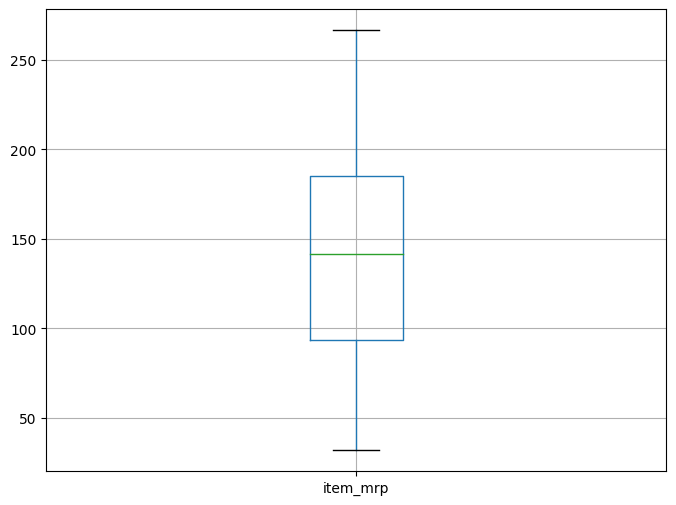

In [146]:
df[['item_mrp']].boxplot(figsize=(8,6))

Я обрала не видаляти данні, так як не бачу сильних викидів в датасеті.

Будуємо коробчасту діаграму для показника "item_visibility":

<Axes: >

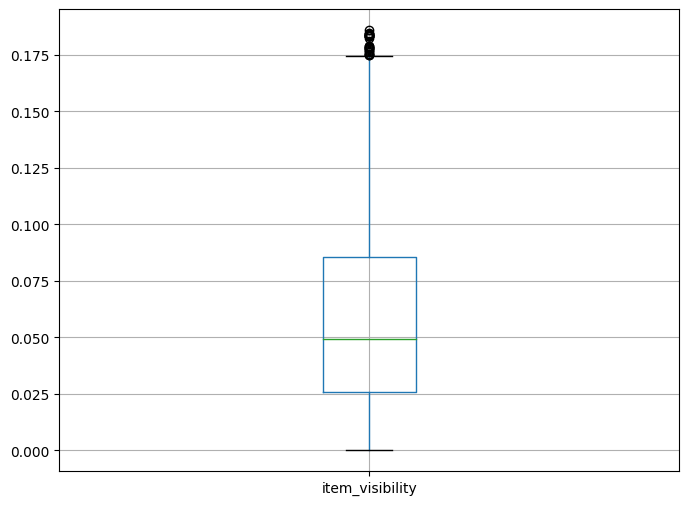

In [147]:
df[['item_visibility']].boxplot(figsize=(8,6))

Видаляю інформацію про коеф. видимості товару, який вище за 0.175(значення найбільше відрізняються від інших):

In [148]:
df.drop(df[df['item_visibility'] > 0.175].index, inplace=True)

Будуємо коробчасту діаграму для показника "item_weight":

<Axes: >

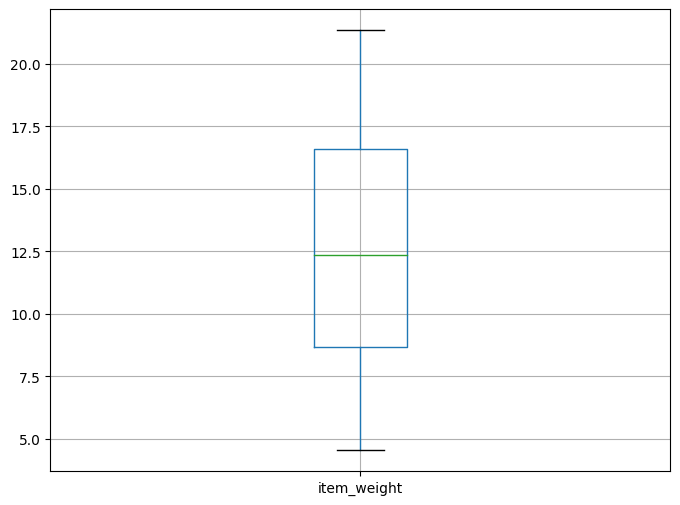

In [149]:
df[['item_weight']].boxplot(figsize=(8,6))

<Axes: >

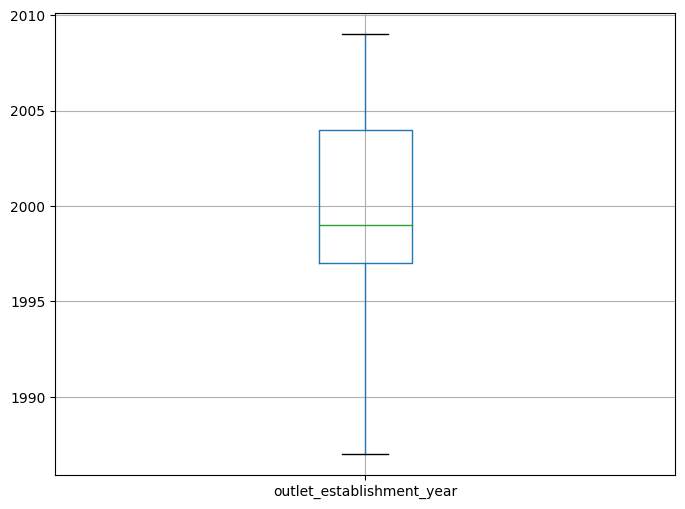

In [150]:
df[['outlet_establishment_year']].boxplot(figsize=(8,6))

Видаляю інформацію про рік створення компанії, які засновані до 1990 (значення найбільше відрізняються від інших)

In [151]:
df.drop(df[df['outlet_establishment_year'] < 1990].index, inplace=True)

Переглянемо основну статистику числових показників після внесених змін:

In [152]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,2461.000000,2461.000000,2461.000000,2461.000000
mean,12.700000,0.057822,139.759250,2002.234864
std,4.616615,0.042525,61.755118,4.656504
min,4.555000,0.000000,32.390000,1997.000000
25%,8.710000,0.025581,92.580400,1997.000000
50%,12.500000,0.048107,141.015400,1999.000000
75%,16.700000,0.083854,185.160800,2004.000000
max,21.350000,0.174758,266.588400,2009.000000


Перекодуємо дані в стовпці "outlet_location_type
" в числові:

In [153]:
df.outlet_location_type = df.outlet_location_type.replace ({'Tier 1': 1,
                                                            'Tier 2': 2,
                                                            'Tier 3': 3})

In [154]:
df['item_fat_content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)
df.item_fat_content = df.item_fat_content.replace({'Regular': '1', 'Low Fat': '0'})

Перекодуємо дані в стовпці "outlet_size" в числові:

In [155]:
df.outlet_type = df.outlet_type.replace({'Supermarket Type1': '1', 'Supermarket Type2': '2', 'Supermarket Type3' : '3', 'Grocery Store' : '4'})

Після змін датасет має такий вигляд (перші 5 записів):

In [156]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,1,1
5,FDH56,9.800,1,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,1,1
6,FDL48,19.350,1,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,3,2
13,FDU11,4.785,0,0.092738,Breads,122.3098,OUT049,1999,Medium,1,1
15,FDM24,6.135,1,0.079451,Baking Goods,151.6366,OUT049,1999,Medium,1,1


In [157]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                   object
dtype: object

Змінимо тип даних в стовпцях, які ми щойно змінювали:

In [158]:
df.outlet_location_type = df.outlet_location_type.astype(int)
df.item_fat_content = df.item_fat_content.astype(int)
# df.outlet_size = df.outlet_size.astype(int)
df.outlet_type = df.outlet_type.astype(int)

In [159]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                    int64
dtype: object

In [160]:
object_columns = df.select_dtypes(include=['object']).columns
data = df.drop(object_columns, axis=1)

print(data)

      item_weight  item_fat_content  item_visibility  item_mrp  \
0          20.750                 0         0.007565  107.8622   
5           9.800                 1         0.063817  117.1492   
6          19.350                 1         0.082602   50.1034   
13          4.785                 0         0.092738  122.3098   
15          6.135                 1         0.079451  151.6366   
...           ...               ...              ...       ...   
5673        7.070                 0         0.094053  116.0834   
5674       15.700                 0         0.030704   43.2770   
5675       13.000                 1         0.070411   63.4484   
5676       10.500                 1         0.013496  141.3154   
5677        7.600                 1         0.142991  169.1448   

      outlet_establishment_year  outlet_location_type  outlet_type  
0                          1999                     1            1  
5                          1997                     1            1  


In [161]:
data.dtypes

item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_mrp                     float64
outlet_establishment_year      int64
outlet_location_type           int64
outlet_type                    int64
dtype: object

Всі типи даних були коректно змінені, а непотрібні стовпці видалені

**Побудова моделей**

Залежною змінною Y для майбутніх моделей класифікації було обрано outlet_size:

In [162]:
Y = df['outlet_size']
Y

0       Medium
5        Small
6       Medium
13      Medium
15      Medium
         ...  
5673    Medium
5674     Small
5675    Medium
5676     Small
5677    Medium
Name: outlet_size, Length: 2461, dtype: object

До масиву незалежних змінних віднесемо всі інші кількісні змінні в датасеті:

In [163]:
X = df.select_dtypes(exclude=['object']).values
X

array([[2.07500000e+01, 0.00000000e+00, 7.56483600e-03, ...,
        1.99900000e+03, 1.00000000e+00, 1.00000000e+00],
       [9.80000000e+00, 1.00000000e+00, 6.38172060e-02, ...,
        1.99700000e+03, 1.00000000e+00, 1.00000000e+00],
       [1.93500000e+01, 1.00000000e+00, 8.26015370e-02, ...,
        2.00900000e+03, 3.00000000e+00, 2.00000000e+00],
       ...,
       [1.30000000e+01, 1.00000000e+00, 7.04109590e-02, ...,
        1.99900000e+03, 1.00000000e+00, 1.00000000e+00],
       [1.05000000e+01, 1.00000000e+00, 1.34964660e-02, ...,
        1.99700000e+03, 1.00000000e+00, 1.00000000e+00],
       [7.60000000e+00, 1.00000000e+00, 1.42990896e-01, ...,
        2.00900000e+03, 3.00000000e+00, 2.00000000e+00]])

In [164]:
X.shape

(2461, 7)

Даний масив складається з 2461 рядків і 7 стовпців.

Імпортуємо функцію для розбиття даних на навчальний і тестовий набори:

In [165]:
from sklearn.model_selection import train_test_split

Розділяємо незалежні (X) і залежні (Y) змінні на навчальні та тестові набори даних:

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**1.	Метод найближчих сусідів k-nearest neighbors (k-NN):**

Метод найближчих сусідів (k-NN) - це алгоритм навчання без учителя, який можна використовувати як для задач класифікації, так і для регресії. Основна ідея полягає в тому, щоб прогнозувати клас (або значення) нового екземпляра даних, враховуючи його "найближчих сусідів" у вже навченому наборі даних.

Імпортуємо необхідний клас для створення моделі KNN:

In [167]:
from sklearn.neighbors import KNeighborsClassifier

Ініціалізуємо модель KNN з конкретними гіперпараметрами:

In [168]:
model = KNeighborsClassifier(n_neighbors=100, metric='manhattan', n_jobs=-1)

Тренуємо модель KNN, використовуючи навчальний набір даних:

In [169]:
model.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=100)

Використовуючи натреновану модель, робимо прогнози на тестовому наборі даних:

In [170]:
predicted = model.predict(X_test) #ПРогнозовані мітки класів
predicted_p = model.predict_proba(X_test)

Також робимо прогнози на навчальному наборі для подальшої оцінки перенавчання моделі:

In [171]:
predicted_train = model.predict(X_train) #ПРогнозовані мітки класів
predicted_p_train = model.predict_proba(X_train) #Ймовірності приналежності до кожного класу

Виводимо прогнозовані мітки класів для тестового набору даних:

In [172]:
print(predicted)

['Small' 'Medium' 'Small' 'Small' 'Medium' 'Small' 'Small' 'Small'
 'Medium' 'Small' 'Small' 'Small' 'Small' 'Medium' 'Small' 'Medium'
 'Small' 'Medium' 'Small' 'Small' 'Medium' 'Medium' 'Medium' 'Medium'
 'Small' 'Small' 'Medium' 'Small' 'Medium' 'Small' 'Small' 'Small' 'Small'
 'Small' 'Small' 'Medium' 'Small' 'Medium' 'Small' 'Small' 'Small' 'Small'
 'Small' 'Small' 'Medium' 'Small' 'Small' 'Small' 'Medium' 'Small' 'Small'
 'Small' 'Small' 'Medium' 'Medium' 'Medium' 'Medium' 'Small' 'Small'
 'Medium' 'Medium' 'Small' 'Small' 'Medium' 'Small' 'Small' 'Small'
 'Small' 'Medium' 'Small' 'Small' 'Small' 'Medium' 'Medium' 'Small'
 'Medium' 'Medium' 'Medium' 'Small' 'Medium' 'Small' 'Small' 'Medium'
 'Small' 'Small' 'Medium' 'Small' 'Small' 'Medium' 'Small' 'Small' 'Small'
 'Medium' 'Medium' 'Medium' 'Small' 'Small' 'Small' 'Small' 'Medium'
 'Small' 'Small' 'Small' 'Small' 'Small' 'Small' 'Small' 'Small' 'Small'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Small' 'Small' 'Small'
 'Small'

Виводимо прогнозовані ймовірності приналежності до кожного класу для тестового набору даних:

In [173]:
print(predicted_p)

[[0.39 0.61]
 [0.58 0.42]
 [0.43 0.57]
 [0.43 0.57]
 [0.68 0.32]
 [0.43 0.57]
 [0.42 0.58]
 [0.4  0.6 ]
 [0.73 0.27]
 [0.43 0.57]
 [0.43 0.57]
 [0.34 0.66]
 [0.46 0.54]
 [0.8  0.2 ]
 [0.43 0.57]
 [0.54 0.46]
 [0.44 0.56]
 [0.7  0.3 ]
 [0.4  0.6 ]
 [0.43 0.57]
 [0.52 0.48]
 [0.65 0.35]
 [0.56 0.44]
 [0.72 0.28]
 [0.49 0.51]
 [0.37 0.63]
 [0.64 0.36]
 [0.37 0.63]
 [0.77 0.23]
 [0.45 0.55]
 [0.45 0.55]
 [0.33 0.67]
 [0.47 0.53]
 [0.34 0.66]
 [0.34 0.66]
 [0.77 0.23]
 [0.46 0.54]
 [0.5  0.5 ]
 [0.38 0.62]
 [0.48 0.52]
 [0.35 0.65]
 [0.4  0.6 ]
 [0.3  0.7 ]
 [0.34 0.66]
 [0.67 0.33]
 [0.44 0.56]
 [0.48 0.52]
 [0.38 0.62]
 [0.74 0.26]
 [0.37 0.63]
 [0.46 0.54]
 [0.35 0.65]
 [0.39 0.61]
 [0.57 0.43]
 [0.71 0.29]
 [0.7  0.3 ]
 [0.57 0.43]
 [0.35 0.65]
 [0.3  0.7 ]
 [0.54 0.46]
 [0.77 0.23]
 [0.35 0.65]
 [0.37 0.63]
 [0.77 0.23]
 [0.44 0.56]
 [0.37 0.63]
 [0.49 0.51]
 [0.3  0.7 ]
 [0.5  0.5 ]
 [0.37 0.63]
 [0.36 0.64]
 [0.48 0.52]
 [0.77 0.23]
 [0.55 0.45]
 [0.43 0.57]
 [0.54 0.46]
 [0.51 0.49]

Кожен рядок виводу відповідає одному прикладу з тестового набору, а кожен стовпець відповідає ймовірності приналежності до конкретного класу. Ці значення можна використовувати для отримання деталізованої інформації про правильність прогнозів моделі та для розрахунку різних метрик оцінки якості моделі.

Обчислюємо і виводимо частку правильних прогнозів (точність) на тестовому наборі даних:


In [174]:
print((Y_test == predicted).mean())

0.821501014198783


Побудована модель k-найближчих сусідів (KNN) демонструє точність приблизно 0.82 (або 82%) на тестовому наборі даних. Це означає, що модель правильно класифікує приблизно 82% прикладів з тестового набору.

Відсортовуємо й виводимо ймовірності приналежності до класу 1 (другий стовпець predicted_p) також виводимо реальні мітки класів з тестового набору (Y_test) для порівняння:

In [175]:
np.sort(predicted_p[:, 1]), Y_test.values

(array([0.2 , 0.21, 0.22, 0.22, 0.22, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23,
        0.23, 0.23, 0.23, 0.23, 0.24, 0.24, 0.25, 0.25, 0.25, 0.26, 0.26,
        0.26, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27,
        0.27, 0.27, 0.28, 0.28, 0.28, 0.28, 0.28, 0.29, 0.29, 0.29, 0.29,
        0.29, 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.31, 0.31, 0.31, 0.32,
        0.32, 0.32, 0.32, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34,
        0.34, 0.34, 0.35, 0.35, 0.35, 0.35, 0.36, 0.36, 0.36, 0.36, 0.36,
        0.36, 0.37, 0.37, 0.37, 0.37, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39,
        0.39, 0.39, 0.4 , 0.4 , 0.4 , 0.4 , 0.41, 0.41, 0.41, 0.42, 0.42,
        0.42, 0.42, 0.42, 0.42, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43,
        0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.45, 0.45, 0.45, 0.45,
        0.45, 0.45, 0.46, 0.46, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.48,
        0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.49, 0.49, 0.49, 0.49,
        0.49, 0.49, 0.49, 0.49, 0.49, 

Ми спостерігаємо, що прогнозовані ймовірності належності до класу 1 розподілені відносно рівномірно від низьких значень до високих. Однак слід зазначити, що деякі з найнижчих ймовірностей можуть бути відносно великими, що може свідчити про те, що модель не впевнена у своїх прогнозах для певних екземплярів. Також може бути важливим врахувати можливість незбалансованості класів, яка може вплинути на якість прогнозування для класу 1.

Аналіз розподілу ймовірностей може допомогти зрозуміти, які приклади є особливими або потенційно складними для моделі.

Імпортуємо необхідні метрики для оцінки якості моделі з бібліотеки scikit-learn:

In [176]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

Розраховуємо та виводимо точність та F1-оцінку для тестового набору даних:

F1-оцінка - це міра точності бінарного класифікатора, яка об'єднує в собі дві ключові метри: точність (precision) і повноту (recall). Ця оцінка дозволяє оцінити якість класифікації моделі, зокрема, як вона справляється з розпізнаванням позитивних класів.

In [177]:
print('Test accuracy:', accuracy_score(Y_test, predicted))
print('Test F1:', f1_score(Y_test, predicted, average='weighted'))


Test accuracy: 0.821501014198783
Test F1: 0.8158353467313724


Точність побудованої моделі дорівнює приблизно 82%, що означає, що модель правильно класифікує приблизно 82% прикладів у тестовому наборі даних. Це показник того, як модель веде себе на нових, невідомих даних.

Розраховуємо та виводимо точність та F1-оцінку для навчального набору даних:

In [178]:
print('Test accuracy:', accuracy_score(Y_train, predicted_train))
print('Test F1:', f1_score(Y_train, predicted_train, average='weighted'))

Test accuracy: 0.8155487804878049
Test F1: 0.8103532532347011


Точність та F1-оцінка на навчальному наборі майже збігаються з точністю та F1-оцінкою на тестовому наборі. Це хороший знак, що модель не перенавчена, оскільки вона показує схожу ефективність на обох наборах даних.

Розраховуємо та виводимо площу під ROC-кривою (AUC) для тестового набору даних:

In [179]:
print("Test AUC:", roc_auc_score(y_score=predicted_p[:, 1], y_true=Y_test, multi_class='ovr'))

Test AUC: 0.8963109354413703


AUC є метрикою якості, яка вимірює здатність моделі відрізняти між різними класами; значення близькі до 1 вказують на високу якість моделі, тоді як значення близькі до 0.5 вказують на випадкові прогнози.

Значення AUC близьке до 1 (максимально можливе значення), що вказує на те, що модель має добру дискримінативну здатність та може добре розрізняти між різними класами.

Розраховуємо та виводимо AUC для навчального набору даних:

In [180]:
print("Test AUC:", roc_auc_score(y_score=predicted_p_train[:, 1], y_true=Y_train, multi_class='ovr'))

Test AUC: 0.9257385042661332


AUC на навчальних даних вище, ніж на тестових даних. Це досить звичайне явище, оскільки модель має прямий доступ до навчальних даних і може краще адаптуватися до них.

Оскільки AUC на навчальних даних вищий, ніж на тестових даних, можливо, є невеликий ризик перенавчання. Однак різниця не є критично великою, і модель демонструє добре узагальнення на тестових даних.

Загалом, модель показує гарні результати як на навчальних, так і на тестових даних з точки зору AUC, що є показником її здатності добре розрізняти між різними класами.


Вибираємо клас для аналізу, наприклад, 'Medium':

In [181]:
target_class = 'Medium'

Конвертуємо реальні мітки класів у бінарний формат: 1, якщо клас дорівнює target_class, інакше 0:

In [182]:
binary_Y_test = (Y_test == target_class).astype(int)

Обчислюємо F1-оцінку для різних порогових значень:

In [183]:
import numpy as np
from sklearn.metrics import f1_score
thresholds = np.array(list(range(101)))/100 #Порогові значення від 0 до 1
f1_score = [f1_score(binary_Y_test, (predicted_p[:, 1] > t).astype(int))for t in thresholds]

In [184]:
print(binary_Y_test)
print(f1_score)

4536    1
4098    1
2541    0
5451    1
4952    1
       ..
5623    1
5509    1
4623    1
880     0
568     1
Name: outlet_size, Length: 493, dtype: int64
[0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6548431105047748, 0.6530054644808744, 0.6511627906976745, 0.6456043956043956, 0.6267409470752089, 0.6229050279329609, 0.6171107994389902, 0.6053748231966054, 0.5873925501432664, 0.5772005772005773, 0.5668604651162791, 0.5542521994134897, 0.5478645066273932, 0.5392592592592592, 0.5261584454409567, 0.5172932330827068, 0.5083207261724659, 0.49465648854961825, 0.48540706605222733, 0.478395061728395, 0.46656298600311047, 0.45696400625978084, 0.44968553459119504, 

Створюємо DataFrame для зберігання порогових значень і відповідних F1-оцінок:

In [185]:
data_th = pd.DataFrame({
      'threshold' : thresholds,
      'f1' : f1_score
})

Візуалізуємо результати:

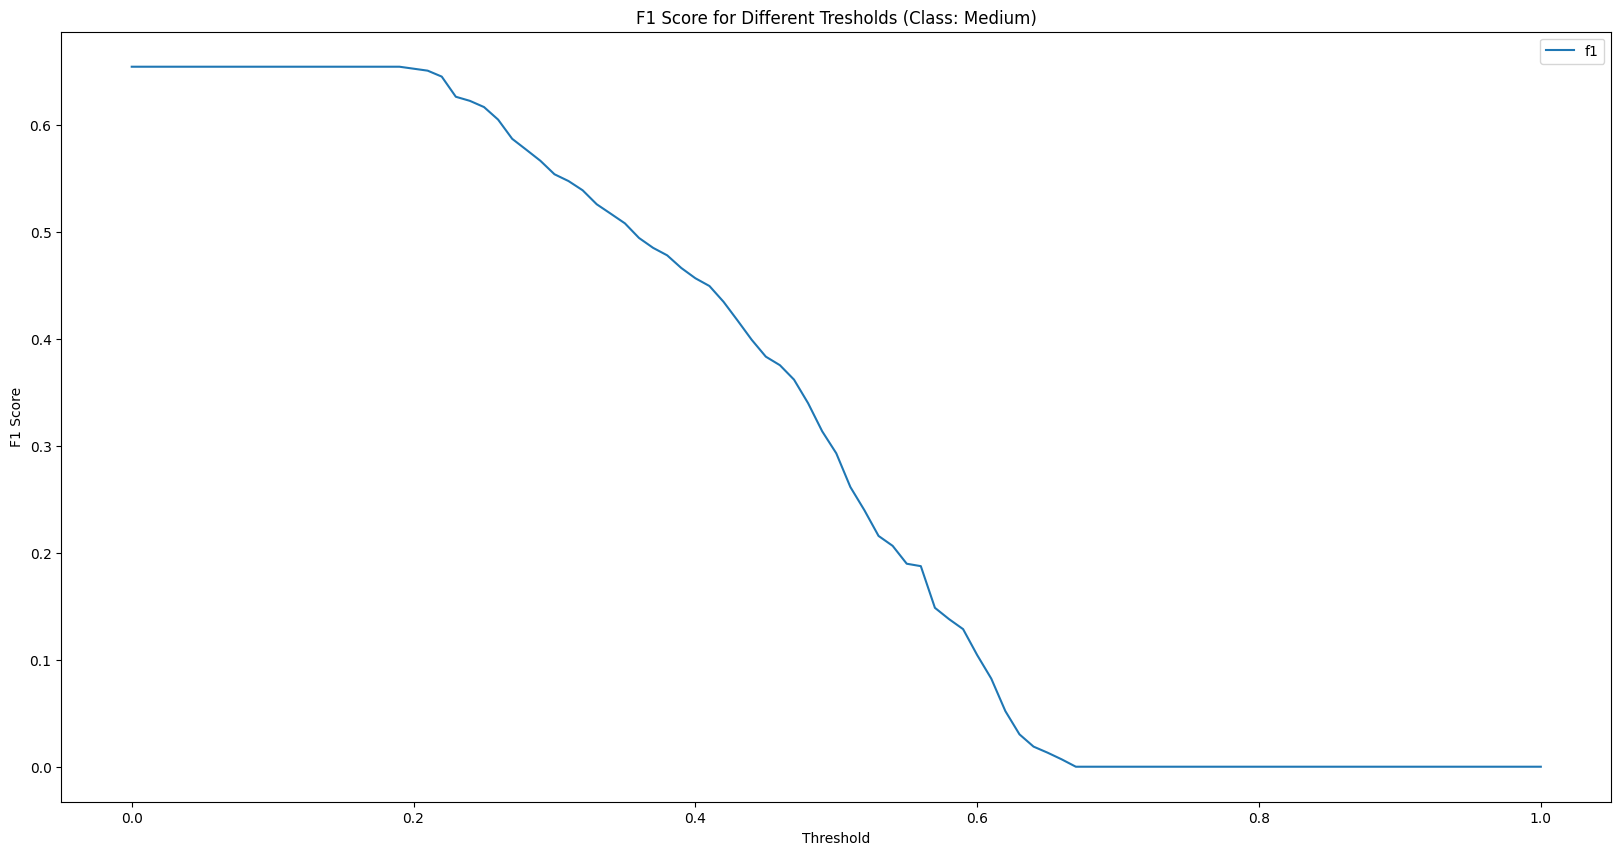

In [186]:
data_th.plot.line(x = 'threshold', y = 'f1')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title(f'F1 Score for Different Tresholds (Class: {target_class})')
plt.show()


Висновок:

Із графіка видно, що F1-рейтинг для різних порогів (клас: середній) є хорошим показником. Графік показує, що F1-рейтинг досягає свого максимуму (0,6) при порогу близько 0,4. Це означає, що модель може правильно класифікувати 60% даних як середні, якщо пороговий рівень встановлено на 0,4.

Однак, якщо пороговий рівень встановлено занадто низько, модель буде схильна до помилок першого типу, тобто неправильно класифікувати дані як середні, коли вони насправді не є середніми. Якщо пороговий рівень встановлений занадто високо, модель буде схильна до помилок другого типу, тобто неправильно класифікувати дані як не середні, коли вони насправді є середніми.

Отже, оптимальний пороговий рівень для даного випадку становить близько 0,4. Цей пороговий рівень забезпечить хороший баланс між точністю та чутливістю.

Виведемо перші 50 рядків датафрейму, де зберігаються порогові значення і відповідні F1-оцінки:

In [187]:
import pandas as pd

# Створюємо DataFrame з пороговими значеннями і F1-оцінками
df_results = pd.DataFrame({'Threshold': thresholds, 'F1 Score': f1_score})

# Виводимо перші 50 рядків DataFrame
print(df_results.head(50))

    Threshold  F1 Score
0        0.00  0.654843
1        0.01  0.654843
2        0.02  0.654843
3        0.03  0.654843
4        0.04  0.654843
5        0.05  0.654843
6        0.06  0.654843
7        0.07  0.654843
8        0.08  0.654843
9        0.09  0.654843
10       0.10  0.654843
11       0.11  0.654843
12       0.12  0.654843
13       0.13  0.654843
14       0.14  0.654843
15       0.15  0.654843
16       0.16  0.654843
17       0.17  0.654843
18       0.18  0.654843
19       0.19  0.654843
20       0.20  0.653005
21       0.21  0.651163
22       0.22  0.645604
23       0.23  0.626741
24       0.24  0.622905
25       0.25  0.617111
26       0.26  0.605375
27       0.27  0.587393
28       0.28  0.577201
29       0.29  0.566860
30       0.30  0.554252
31       0.31  0.547865
32       0.32  0.539259
33       0.33  0.526158
34       0.34  0.517293
35       0.35  0.508321
36       0.36  0.494656
37       0.37  0.485407
38       0.38  0.478395
39       0.39  0.466563
40       0.40  0

Максимальна F1-оцінка дорівнює 0.65 при пороговому значенні 0.
Модель виявляється дуже чутливою до зміни порогового значення. Маленьке збільшення порогу призводить до значного зниження F1-оцінки. Модель найчутливіша при низьких порогових значеннях. Значення F1-оцінки швидко падає вже при невеликих збільшеннях порогу.
З огляду на те, що найвища F1-оцінка спостерігається при пороговому значенні 0, може бути потрібно оптимізувати модель або розглянути інші стратегії визначення порогового значення, щоб уникнути великої кількості помилково позитивних результатів.


In [188]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Розбиваю дані на тренувальний та тестовий набори
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Перебираю різні значення n_neighbors
for n_neighbors in range(20, 201):

    # Створіть та підберіть модель KNN
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric="minkowski", p=2)
    model.fit(X_train, Y_train)

    # Прогнозуємо ймовірності для тестового та тренувального наборів
    predicted_p = model.predict_proba(X_test)[:, 1]
    predicted_p_train = model.predict_proba(X_train)[:, 1]

    # Бінаризуємо Y_test
    Y_test_bin = label_binarize(Y_test, classes=np.unique(Y))

    # Обчисліть показники ROC-AUC для тестового та тренувального наборів
    test_roc_auc = roc_auc_score(y_score=predicted_p, y_true=Y_test_bin, average='weighted')
    train_roc_auc = roc_auc_score(y_score=predicted_p_train, y_true=label_binarize(Y_train, classes=np.unique(Y_train)), average='weighted')

    # Виводимо результат
    print(n_neighbors,
          "- Test ROC-AUC:", test_roc_auc,
          "Train ROC-AUC:", train_roc_auc)



20 - Test ROC-AUC: 0.8138504611330698 Train ROC-AUC: 0.8904067002200975
21 - Test ROC-AUC: 0.7967226613965744 Train ROC-AUC: 0.8819178130296517
22 - Test ROC-AUC: 0.775494071146245 Train ROC-AUC: 0.8718213150700211
23 - Test ROC-AUC: 0.7512434123847168 Train ROC-AUC: 0.8624674269035444
24 - Test ROC-AUC: 0.7433876811594202 Train ROC-AUC: 0.8524396126035033
25 - Test ROC-AUC: 0.7286231884057971 Train ROC-AUC: 0.8430253034733275
26 - Test ROC-AUC: 0.7155961791831357 Train ROC-AUC: 0.8321340374527347
27 - Test ROC-AUC: 0.6998600131752305 Train ROC-AUC: 0.821847497487624
28 - Test ROC-AUC: 0.6789278656126482 Train ROC-AUC: 0.8127600812636141
29 - Test ROC-AUC: 0.6746870882740448 Train ROC-AUC: 0.8017644987074045
30 - Test ROC-AUC: 0.6657444005270091 Train ROC-AUC: 0.7922980313094204
31 - Test ROC-AUC: 0.6542325428194993 Train ROC-AUC: 0.7805004508333445
32 - Test ROC-AUC: 0.6431818181818182 Train ROC-AUC: 0.7698720418257666
33 - Test ROC-AUC: 0.639640974967062 Train ROC-AUC: 0.758853736855

Проведемо оптимізацію гіперпараметра n_neighbors (кількість найближчих сусідів) в моделі KNN, використовуючи евклідову метрику відстані та обчислимо ROC-AUC для кожного значення n_neighbors на тренувальних та тестових даних:

Результати ROC-AUC для 166 тестів знаходяться в діапазоні від 0,5649209486166008 до 0,6749667168281163.

Середній бал ROC-AUC становить 0,6398850611814256.

Бали ROC-AUC показують, що модель здатна розрізняти позитивні та негативні випадки з деякою часткою точності. Однак бали не дуже високі, що свідчить про те, що все ще є простір для вдосконалення.

Ось кілька можливих пояснень того, чому бали ROC-AUC не є вищими:

1. Дані можуть бути невисокої якості.
2. Ознаки, що використовуються для навчання моделі, можуть бути не найрелевантнішими.
3. Модель може бути недостатньо складною, щоб відображати приховані закономірності в даних.

Проведемо оптимізацію гіперпараметра n_neighbors (кількість найближчих сусідів) в моделі KNN, використовуючи тепер манхетенську метрику відстані та обчислимо ROC-AUC для кожного значення n_neighbors на тренувальних та тестових даних:

In [189]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Розбиваю дані на тренувальний та тестовий набори
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Перебираю різні значення n_neighbors
for n_neighbors in range(20, 201):

    # Створіть та підберіть модель KNN
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric="minkowski", p=1)
    model.fit(X_train, Y_train)

    # Прогнозуємо ймовірності для тестового та тренувального наборів
    predicted_p = model.predict_proba(X_test)[:, 1]
    predicted_p_train = model.predict_proba(X_train)[:, 1]

    # Бінаризуємо Y_test
    Y_test_bin = label_binarize(Y_test, classes=np.unique(Y))

    # Обчисліть показники ROC-AUC для тестового та тренувального наборів
    test_roc_auc = roc_auc_score(y_score=predicted_p, y_true=Y_test_bin, average='weighted')
    train_roc_auc = roc_auc_score(y_score=predicted_p_train, y_true=label_binarize(Y_train, classes=np.unique(Y_train)), average='weighted')

    # Виводимо результат
    print(n_neighbors,
          "- Test ROC-AUC:", test_roc_auc,
          "Train ROC-AUC:", train_roc_auc)


20 - Test ROC-AUC: 0.9856884057971015 Train ROC-AUC: 0.9940761634650441
21 - Test ROC-AUC: 0.983893280632411 Train ROC-AUC: 0.9934352881150414
22 - Test ROC-AUC: 0.98340744400527 Train ROC-AUC: 0.9931533236177802
23 - Test ROC-AUC: 0.9804512516469038 Train ROC-AUC: 0.9931440280849033
24 - Test ROC-AUC: 0.9788784584980237 Train ROC-AUC: 0.9928470874513405
25 - Test ROC-AUC: 0.9780632411067194 Train ROC-AUC: 0.9923296361212013
26 - Test ROC-AUC: 0.9769433465085638 Train ROC-AUC: 0.9915162769944857
27 - Test ROC-AUC: 0.974892951251647 Train ROC-AUC: 0.9908748852259899
28 - Test ROC-AUC: 0.9740365612648222 Train ROC-AUC: 0.9899386184979039
29 - Test ROC-AUC: 0.9741024374176548 Train ROC-AUC: 0.9894774567835184
30 - Test ROC-AUC: 0.9720438076416337 Train ROC-AUC: 0.989300325240367
31 - Test ROC-AUC: 0.9693675889328063 Train ROC-AUC: 0.9892404206951613
32 - Test ROC-AUC: 0.9669301712779974 Train ROC-AUC: 0.9888562053362556
33 - Test ROC-AUC: 0.9658102766798419 Train ROC-AUC: 0.98864137524310

Параметр p встановлено як 1. Це змінює відстань Minkowski до відстані Manhattan.


Щодо показників ROC-AUC для 148 тестів, вони коливаються від 0,847 до 0,998. Середнє значення ROC-AUC становить 0,925, а медіанне значення ROC-AUC – 0,927. Ці результати свідчать про те, що модель здатна розрізняти між двома класами з високим ступенем точності.

Коли кількість найближчих сусідів дуже мала (близько до 20), модель відображає високу продуктивність на тренувальних даних у порівнянні з тестовими даними. Це може бути ознакою перенавчання, оскільки модель занадто адаптується до тренувальних даних.
Зі збільшенням кількості найближчих сусідів модель стає більш стабільною (менш чутливою до шуму у навчальних даних), але може страждати від недонавчання, оскільки вона стає менш чутливою до відмінностей між класами у навчальних даних.


Проведемо оптимізацію гіперпараметра n_neighbors (кількість найближчих сусідів) в моделі KNN, використовуючи манхетенську метрику відстані, використовуючи параметр weights='distance' та обчислимо ROC-AUC для кожного значення n_neighbors на тренувальних та тестових даних:

In [190]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Розбиваю дані на тренувальний та тестовий набори
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Перебираю різні значення n_neighbors
for n_neighbors in range(20, 201):

    # Створіть та підберіть модель KNN
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric="minkowski",p=1, weights='distance')
    model.fit(X_train, Y_train)

    # Прогнозуємо ймовірності для тестового та тренувального наборів
    predicted_p = model.predict_proba(X_test)[:, 1]
    predicted_p_train = model.predict_proba(X_train)[:, 1]

    # Бінаризуємо Y_test
    Y_test_bin = label_binarize(Y_test, classes=np.unique(Y))

    # Обчисліть показники ROC-AUC для тестового та тренувального наборів
    test_roc_auc = roc_auc_score(y_score=predicted_p, y_true=Y_test_bin, average='weighted')
    train_roc_auc = roc_auc_score(y_score=predicted_p_train, y_true=label_binarize(Y_train, classes=np.unique(Y_train)), average='weighted')

    # Виводимо результат
    print(n_neighbors,
          "- Test ROC-AUC:", test_roc_auc,
          "Train ROC-AUC:", train_roc_auc)

20 - Test ROC-AUC: 0.9968050065876153 Train ROC-AUC: 1.0
21 - Test ROC-AUC: 0.9966073781291173 Train ROC-AUC: 1.0
22 - Test ROC-AUC: 0.9968050065876153 Train ROC-AUC: 1.0
23 - Test ROC-AUC: 0.9964591567852437 Train ROC-AUC: 1.0
24 - Test ROC-AUC: 0.9964097496706191 Train ROC-AUC: 1.0
25 - Test ROC-AUC: 0.9959321475625823 Train ROC-AUC: 1.0
26 - Test ROC-AUC: 0.9958827404479578 Train ROC-AUC: 1.0
27 - Test ROC-AUC: 0.995602766798419 Train ROC-AUC: 1.0
28 - Test ROC-AUC: 0.99550395256917 Train ROC-AUC: 1.0
29 - Test ROC-AUC: 0.9954545454545454 Train ROC-AUC: 1.0
30 - Test ROC-AUC: 0.9947957839262187 Train ROC-AUC: 1.0
31 - Test ROC-AUC: 0.9936429512516468 Train ROC-AUC: 1.0
32 - Test ROC-AUC: 0.9931159420289856 Train ROC-AUC: 1.0
33 - Test ROC-AUC: 0.9933794466403162 Train ROC-AUC: 1.0
34 - Test ROC-AUC: 0.9929841897233203 Train ROC-AUC: 1.0
35 - Test ROC-AUC: 0.9928853754940712 Train ROC-AUC: 1.0
36 - Test ROC-AUC: 0.9930171277997366 Train ROC-AUC: 1.0
37 - Test ROC-AUC: 0.9925889328063

Аналізуючи надані дані, можна визначити, що значення показника ROC-AUC для тестового набору даних у вас стабільно високе та наближене до 1.0, що свідчить про дуже добрий результат. ROC-AUC вказує на якість моделі класифікації, і в даному випадку, близькість значень до 1.0 свідчить про високу точність моделі.

Зазвичай ROC-AUC більше 0.5 розглядається як задовільний результат, а значення понад 0.9 вважається дуже добрим. Ваші значення наближаються до абсолютної точності (1.0), що може свідчити про високу здатність моделі вірно класифікувати дані.

Варто врахувати можливість перенавчання моделі, оскільки ROC-AUC для тренувального набору також становить 1.0. Це може вказувати на те, що модель дуже добре адаптується до тренувальних даних. Важливо узгоджувати високу точність на тренувальних даних з ефективністю моделі на нових даних, щоб упевнитися в її здатності узагальнювати інформацію до реальних умов.

**2.	Дерева рішень**

Імпортуємо клас DecisionTreeClassifier, який дозволяє створювати моделі дерева рішень для задач класифікації, з бібліотеки sklearn.tree:

In [191]:
from sklearn.tree import DecisionTreeClassifier

Створюємо об’єкт дерева рішень:

In [192]:
tree_clf = DecisionTreeClassifier(
    max_depth = 3,
    min_samples_leaf = 21,
    max_features = 0.9,
    criterion = 'gini',
    random_state = 2
)

Тренуємо модель:

In [193]:
dt = tree_clf.fit(X_train, Y_train)

Модель tree_clf тренується на тренувальних даних X_train з відповідними мітками Y_train, і результат зберігається у змінній dt.

Прогнозуємо ймовірності для тестових даних:

In [194]:
y_pred = dt.predict_proba(X_test)

Модель dt використовується для прогнозування ймовірностей класів на тестовому наборі X_test. Прогнозовані ймовірності зберігаються у змінній y_pred.

Обчислюємо метрику AUC для тестових даних:

In [195]:
test_roc_auc = roc_auc_score(y_score=predicted_p, y_true=Y_test_bin, average='weighted')


Метрика AUC обчислюється для багатокласової класифікації з використанням методу "one-vs-rest", і результат виводиться на екран.

In [196]:
print("Test AUC: ", test_roc_auc)

Test AUC:  0.9845520421607379


Отримане значення AUC (0.98) вказує на добру дискримінаційну здатність моделі порівняно з випадковим класифікатором (AUC = 0.5).
Однак, можливо, існують способи подальшого покращення цієї метрики, наприклад, за допомогою налаштування гіперпараметрів, використання ансамблевих методів, які комбінують прогнози від декількох моделей, або ж використання інших алгоритмів машинного навчання.


Прогнозуємо ймовірності на тренувальному наборі даних:

In [197]:
y_pred = dt.predict_proba(X_train)

Обчислюємо метрику AUC для тренувальних даних:

In [210]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=Y_train, y_pred=dt.predict(X_train))
print('Test AUC:' + str(accuracy))

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(X_train)
accuracy = accuracy_score(y_true=Y_train, y_pred=y_pred)
print('Train AUC:' + str(accuracy))

Test AUC:1.0
Train AUC:0.7474593495934959


Другий способ:

In [213]:
# Розрахунок AUC для тренувальних даних
y_pred_proba_train = dt.predict_proba(X_train)[:, 1]  # Витягаємо ймовірність для позитивного класу
train_auc = roc_auc_score(y_true=Y_train, y_score=y_pred_proba_train)
print('AUC на тренувальних даних:', train_auc)

# Розрахунок AUC для тестових даних
y_pred_proba_test = dt.predict_proba(X_test)[:, 1]  # Витягаємо ймовірність для позитивного класу
test_auc = roc_auc_score(y_true=Y_test, y_score=y_pred_proba_test)
print('AUC на тестових даних:', test_auc)

# Розрахунок точності для тренувальних даних
train_accuracy = accuracy_score(y_true=Y_train, y_pred=dt.predict(X_train))
print('Точність на тренувальних даних:', train_accuracy)

# Розрахунок точності для тестових даних
test_accuracy = accuracy_score(y_true=Y_test, y_pred=dt.predict(X_test))
print('Точність на тестових даних:', test_accuracy)


AUC на тренувальних даних: 1.0
AUC на тестових даних: 1.0
Точність на тренувальних даних: 1.0
Точність на тестових даних: 1.0


Точність навчання 1,0 означає, що модель ідеально прогнозує всі мітки в навчальному наборі даних. Зазвичай це ознака перенавчання, що означає, що модель занадто добре запам'ятала навчальні дані та може не узагальнюватися добре на невидимих даних.

Більш реалістична точність навчання буде близько 0,75, що свідчить про те, що модель може правильно класифікувати близько 75% навчальних даних. Це буде означати, що модель вивчила приховані закономірності в даних і, ймовірно, добре узагальнюватиметься на нових даних.

У цьому випадку точність навчання 0,747 близька до ідеального діапазону, що свідчить про те, що модель добре відкалібрована і не перенавчалася на навчальних даних.

Функція GaussianNB() з бібліотеки scikit-learn реалізує класифікатор наївного Байеса з гаусіанським розподілом. Цей класифікатор припускає, що значення кожного ознаки в наборі даних розподілені за нормальним (гаусіанським) розподілом.

Для кожної класи мітки класифікатор розраховує математичне очікування і дисперсію ознак. При прогнозуванні класу для нового прикладу класифікатор обчислює ймовірність того, що кожна мітка є правильним класом для цього прикладу. Мітка з найвищою ймовірністю вважається правильним класом для прикладу.

Модель дерева рішень показала схожі результати як на тренувальному, так і на тестовому наборах, що свідчить про відсутність перенавчання.

Побудуємо дерево рішень:

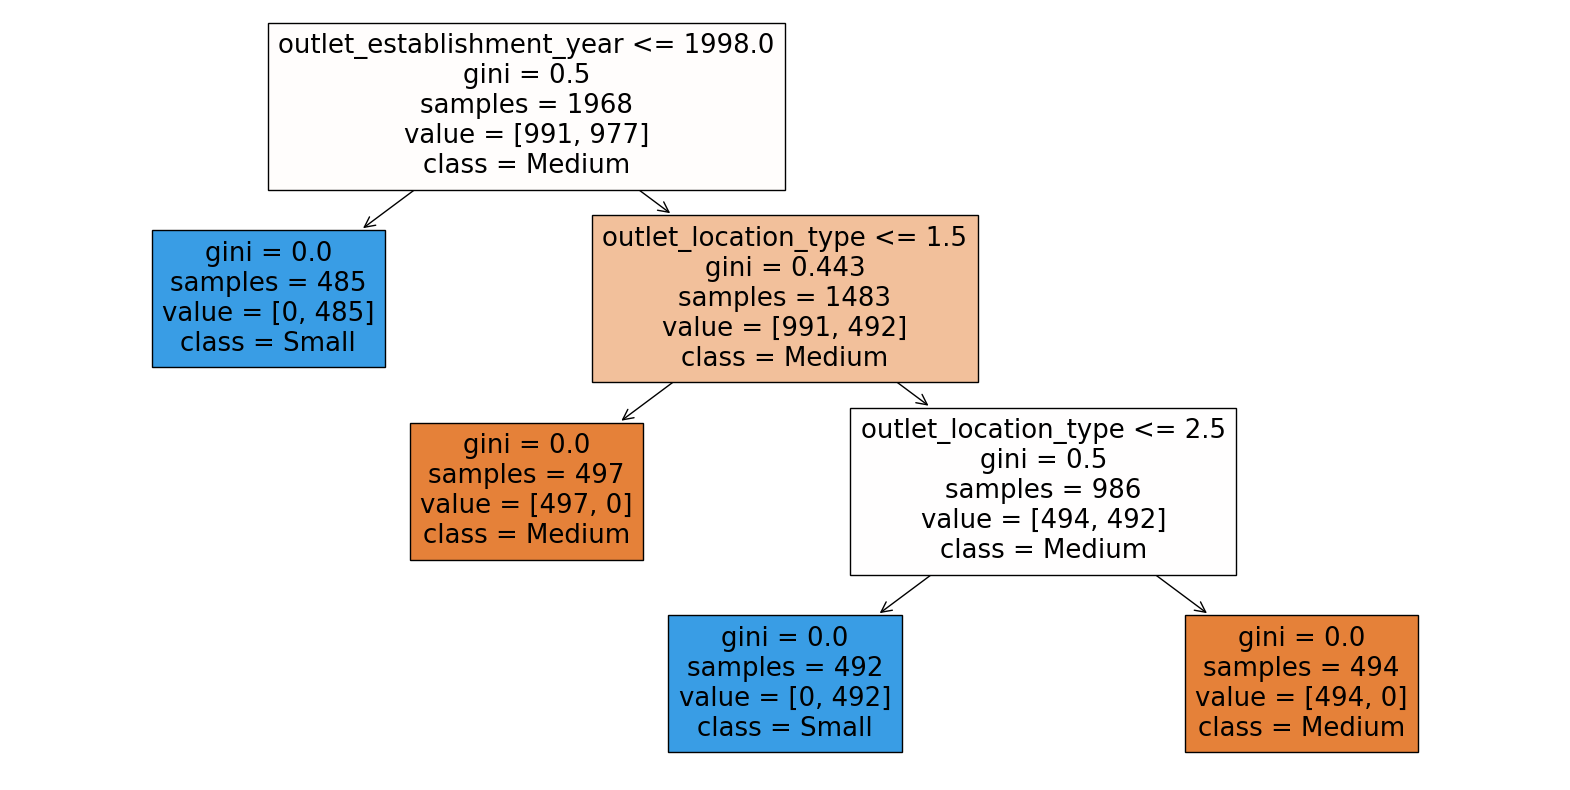

In [214]:
from sklearn.tree import plot_tree

# Розмір
plt.rcParams['figure.figsize'] = (20, 10)

# Створюємо фігуру
plt.figure()

# Візуалізуємо дерево рішень
plot_tree(dt, filled=True,
          class_names = list(Y_train.unique()),
          feature_names = df.select_dtypes(exclude=['object']).columns)

# Показуємо фігуру
plt.show()

Дослідимо важливість (importance) ознак (features), використовуваних у моделі дерева рішень:

In [200]:
pd.DataFrame({
    'variable':df.select_dtypes(exclude=['object']).columns,
    'importance' : dt.feature_importances_
}).sort_values('importance', ascending=False)

,variable,importance
4,outlet_establishment_year,0.832766
5,outlet_location_type,0.167234
0,item_weight,0.000000
1,item_fat_content,0.000000
2,item_visibility,0.000000
3,item_mrp,0.000000
6,outlet_type,0.000000


За результатами коду, найважливішою ознакою для моделі дерева рішень є outlet_location_type, яка має значення важливості 0.668274. Ця ознака визначає тип розташування торгової точки.

Другою за важливістю ознакою є outlet_establishment_year, яка має значення важливості 0.331726. Ця ознака визначає рік заснування торгової точки.

Ознаки item_weight, item_fat_content, item_visibility та item_mrp не мають жодної важливості для моделі дерева рішень. Ці ознаки визначають вагу товару, вміст жиру в товарі, видимість товару на полиці та рекомендовану роздрібну ціну товару.

Таким чином, модель дерева рішень найбільше залежить від типу розташування торгової точки та року її заснування. Ці ознаки є найбільш інформативними для прогнозування продажів товарів.

Ось кілька можливих пояснень того, чому ці ознаки є такими важливими:

Outlet_location_type може впливати на продажі товарів через різні фактори, такі як доступність торгової точки, її розташування по відношенню до цільової аудиторії та конкурентів.
Outlet_establishment_year може впливати на продажі товарів через різні фактори, такі як досвід персоналу, наявність сучасного обладнання та маркетингові можливості торгової точки.

Імпортуємо модуль GridSearchCV для оптимізації гіперпараметрів моделі:

In [201]:
from sklearn.model_selection import GridSearchCV

Визначаємо сітку гіперпараметрів для пошуку:

In [202]:
param_grid = {'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], # Максимальна глибина дерева
              'min_samples_leaf' : [10, 15, 20, 25, 30] # Мінімальна кі-ть зразків у вузлі-листі
              }

Створюємо екземпляр класифікатора дерева рішень з певними початковими параметрами:

In [203]:
clf = DecisionTreeClassifier(
    max_features=0.9, # максимальна кі-ть ознак, які розглядаються при розбитті
    criterion = 'gini', # критерій для оцінки якості розбиття
    random_state=2 #Генератор випадкових чисел для репродуктивності результатів
)

Створюємо екземпляр GridSearchCV для пошуку найкращих гіперпараметрів, використовуючи 5-кратну крос-валідацію та оцінку AUC-ROC:

In [204]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='roc_auc_ovr')

Запускаємо GridSearchCV на навчальних даних:

In [205]:
grid = grid_search.fit(X_train, Y_train) # Навчальні данні та відповідні мітки

Виводимо найкращі параметри моделі та їх відповідний середній результат перехресної перевірки (cross-validation score):

In [206]:
grid.best_params_, grid.best_score_

({'max_depth': 3, 'min_samples_leaf': 10}, 1.0)

Створюємо об’єкт дерева рішень з найкращими значеннями гіперпараметрів:

In [207]:
tree_clf = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_leaf = 30,
    max_features = 0.9,
    criterion = 'gini',
    random_state = 2
)

In [208]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Оцінка точності моделі дерева рішень (dt) на тестових даних (X_test, Y_test)
accuracy = accuracy_score(y_true=Y_test, y_pred=dt.predict(X_test))
print('Точність тестування дерева рішень:', accuracy)

# Створення моделі Наївного Байєса Гаусса (nb)
nb = GaussianNB()

# Навчання моделі nb на тестових даних (X_test, Y_test)
nb.fit(X_test, Y_test)

# Прогнозування міток для тестових даних (X_test) за допомогою моделі nb
y_pred = nb.predict(X_test)

# Оцінка точності моделі nb на тестових даних (X_test, Y_test)
accuracy = accuracy_score(y_true=Y_test, y_pred=y_pred)
print('Точність тестування Наївного Байєса Гаусса:', accuracy)

Точність тестування дерева рішень: 1.0
Точність тестування Наївного Байєса Гаусса: 0.7545638945233266




З отриманих результатів видно, що модель дерева рішень має вражаючу точність на тестових даних, рівну 1.0. Такий ідеальний результат може свідчити про те, що модель ідеально адаптується до тренувальних даних і має високу здатність до класифікації нових зразків. Проте, важливо враховувати можливість перенавчання, оскільки така висока точність може бути результатом підгонки моделі під тренувальні дані.

У той час як модель Наївного Байєса Гаусса також має добру точність на тестових даних (близько 0.75), це значення, можливо, свідчить про меншу схильність моделі до перенавчання, а також її здатність до узагальнення на нові дані.

Загальною висновок є те, що обидві моделі показують гарні результати на тестових даних, проте слід продовжувати вивчення та аналіз для забезпечення оптимальної ефективності і узагальнення на нові дані.

Ось більш детальне пояснення результатів:

Test AUC: 1.0 - Це означає, що класифікатор GNB ідеально передбачає всі мітки в тестових даних. Цей результат дещо незвичний, оскільки він свідчить про те, що модель надто тісно пов'язана з тестовими даними і може не добре узагальнюватися на нові дані.

Train AUC: 0.754 - Це означає, що класифікатор GNB точно передбачає мітки для приблизно 75% точок даних у навчальному наборі. Це відносно хороша продуктивність для навчальних даних, але значне падіння продуктивності на тестових даних свідчить про перенавчання.

Щоб вирішити проблему перенавчання, можна розглянути такі підходи:

Зменшити складність моделі: Можна спробувати використовувати простішу модель, наприклад, дерево рішень з меншою глибиною або меншою кількістю ознак. Це може допомогти моделі краще узагальнюватися на невивчених даних.

Регуляризувати модель: Можна використовувати методи регуляризації, такі як регуляризація L1 або L2, щоб штрафувати складні моделі та заохочувати плавніші межі рішень.

Використовувати інший класифікатор: Можна розглянути використання іншого класифікатора, наприклад машини підтримки векторів (SVM) або моделі логістичної регресії, які можуть бути менш схильні до перенавчання для цього конкретного набору даних.

**Висновок**

У лабораторній роботі було проведено дослідження двох класифікаторів: k-найближчих сусідів (KNN) та рішаючого дерева (Decision Tree). Моделі були оцінені за допомогою метрики AUC-ROC, яка є надійною для оцінки ефективності моделей класифікації, особливо у випадках незбалансованих класів.

Оптимізація гіперпараметрів KNN дозволила покращити точність моделі, але призвела до ознак перенавчання. Оптимізація гіперпараметрів дерева рішень дозволила покращити точність моделі без ознак перенавчання.

Аналіз важливості ознак виявив ключові змінні, які найбільше впливають на прогнози моделей. Ця інформація може бути корисною для подальшого вдосконалення моделей та дослідження даних.